# 3.2 Data Cleaning and EDA

## Combine two dataframe

In [2]:
import pandas as pd

In [3]:
# import data for further steps
subreddit_1 = pd.read_csv('./datasets/subreddit_1.csv')
subreddit_2 = pd.read_csv('./datasets/subreddit_2.csv')

In [4]:
# add class for each sub dataset
# spacex as 1, blueorigin as 0
subreddit_1['class'] = 1

# change column name 0 as post
subreddit_1 = subreddit_1.rename({'0': 'post'}, axis='columns')

In [5]:
# spacex as 1, blueorigin as 0
subreddit_2['class'] = 0

# change column name 0 as post
subreddit_2 = subreddit_2.rename({'0': 'post'}, axis='columns')

In [6]:
# combine two datasets
posts = pd.concat([subreddit_1, subreddit_2], ignore_index=True)

In [7]:
# check how posts look like
posts.head()

post  class
0  The Pentagon is asking Congress for $1.7 billi...      1
1  SpaceIL's lunar spacecraft (SpaceX payload) ar...      1
2  Fantastic shot of Just Read The Instructions o...      1
3  UPDATE: #SpaceX Falcon Heavy STP-2 now targeti...      1
4  SpaceX seeks FCC OK for 1 million satellite br...      1

## Train/test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = posts['post']
y = posts['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# store data for further use
%store X_train
%store X_test
%store y_train
%store y_test

Stored 'X_train' (Series)
Stored 'X_test' (Series)
Stored 'y_train' (Series)
Stored 'y_test' (Series)


In [14]:
len(y_train[y_train == 0])

738

In [15]:
len(y_train[y_train == 1])

736

## Plus(self practice): Check word frequency to have an overview of the dataset

### Remove punctuation

In [10]:
subreddit_1['post'] = subreddit_1['post'].str.replace("[^a-zA-Z]", " ")
subreddit_2['post'] = subreddit_2['post'].str.replace("[^a-zA-Z]", " ")

In [37]:
subreddit_1['post'][2].lower()

'fantastic shot of just read the instructions out at sea'

In [38]:
# store data for further use
%store subreddit_1

Stored 'subreddit_1' (DataFrame)


### Create word frequency dictionary for both subreddit_1 and subreddit_2

In [11]:
# Instantiate empty dictionary.
words_frequency_1 = {}

# Iterate through each word in each sentence.
for sentence in list(subreddit_1['post']):
    for word in sentence.split():
        
        # Create a key-value pair in the dictionary for each word,
        # with the key being the word and the value = 0.
        # And assign a value of 0. 
        if word.lower() in words_frequency_1:
            words_frequency_1[word.lower()] += 1
        else:
            words_frequency_1[word.lower()] = 1

In [12]:
# Instantiate empty dictionary.
words_frequency_2 = {}

# Iterate through each word in each sentence.
for sentence in list(subreddit_2['post']):
    for word in sentence.split():
        
        # Create a key-value pair in the dictionary for each word,
        # with the key being the word and the value = 0.
        # And assign a value of 0. 
        if word.lower() in words_frequency_2:
            words_frequency_2[word.lower()] += 1
        else:
            words_frequency_2[word.lower()] = 1

In [13]:
len(words_frequency_1)

2891

In [14]:
len(words_frequency_2)

2442

### Remove stopwords

In [15]:
from nltk.corpus import stopwords

# Load stop words
stop_words = stopwords.words('english')

# remove stopwords for words_
for word in stop_words:
    if word in words_frequency_1:
        del words_frequency_1[word]
        
# remove stopwords for words_
for word in stop_words:
    if word in words_frequency_2:
        del words_frequency_2[word]

In [16]:
len(words_frequency_1)

2770

In [17]:
len(words_frequency_2)

2321

### Lemmatize words

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [19]:
for word in words_frequency_1:
    lemmatizer.lemmatize(word)

In [20]:
for word in words_frequency_2:
    lemmatizer.lemmatize(word)

In [21]:
len(words_frequency_1)

2770

In [22]:
len(words_frequency_2)

2321

### Count word frequency

In [23]:
# transfer dictionary to dataframe
df1 = pd.DataFrame.from_dict(data=words_frequency_1, orient='index', columns=['counts'])
df1 = df1.reset_index()

In [24]:
# transfer dictionary to dataframe
df2 = pd.DataFrame.from_dict(data=words_frequency_2, orient='index', columns=['counts'])
df2 = df2.reset_index()

In [25]:
# sort word counts in a descending order and get the top 200 high frequency words
# spacex
df1.sort_values(by='counts', ascending=False).head(10)

index  counts
10     spacex     451
95     launch     231
21     falcon     207
137   twitter     122
81     dragon     113
171  starship      96
22      heavy      95
201      crew      92
118     space      91
162      elon      90

In [26]:
# sort word counts in a descending order and get the top 200 high frequency words
# blueorigin
df2.sort_values(by='counts', ascending=False).head(10)

index  counts
59     blue     452
60   origin     382
2       new     328
38    space     136
88  shepard     133
9     bezos     132
86   launch     118
8      jeff     112
3     glenn     105
5    rocket      91

## EDA

### Generate wordcloud to show the frequency of each word

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

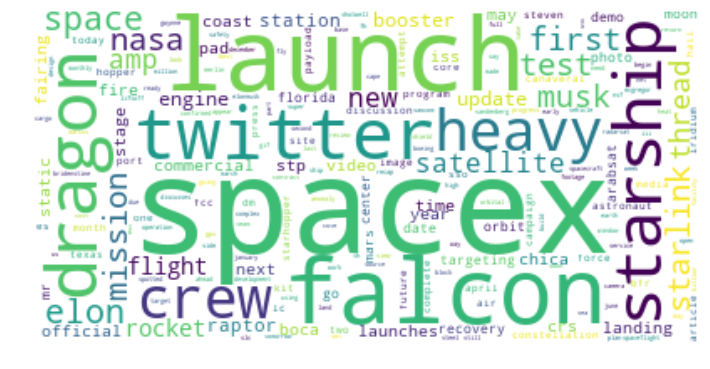

In [30]:
# spacex
# create word cloud based on word count
# words with higher word count will be bigger
text1 = ''
for i in df1.index:
    text1 = text1 + (df1['index'][i] + ' ') * df1['counts'][i]

    
wordcloud = WordCloud(max_font_size=80, 
                      max_words=200, 
                      background_color="white",
                     collocations=False).generate(text1)
plt.figure(figsize= [12,9])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

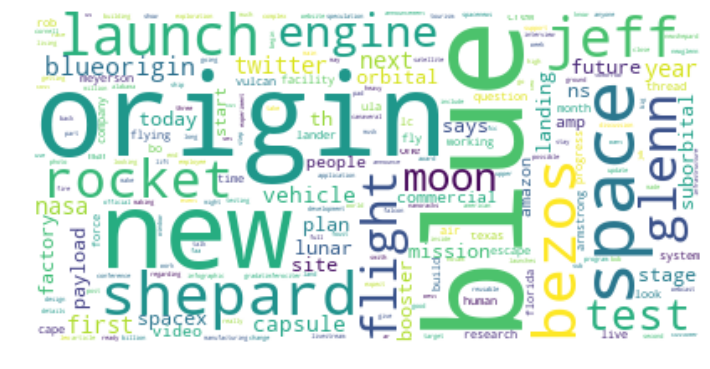

In [29]:
# blueorigin
# create word cloud based on word count
# words with higher word count will be bigger
text2 = ''
for i in df2.index:
    text2 = text2 + (df2['index'][i] + ' ') * df2['counts'][i]

    
wordcloud = WordCloud(max_font_size=80, 
                      max_words=200, 
                      background_color="white",
                     collocations=False).generate(text2)
plt.figure(figsize= [12,9])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()